In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
station_column = [column.name for column in station.__table__.columns]
print(station_column)
measurement_column = [column.name for column in measurement.__table__.columns]
print(measurement_column)

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']
['id', 'station', 'date', 'prcp', 'tobs']


In [10]:
# Find the most recent date in the data set.
most_recent = session.query(measurement).order_by(measurement.date.desc()).first()
print(most_recent.date)

2017-08-23


In [12]:
# end_date = most_recent.date
# end_date = dt.datetime.strptime(end_date, '%Y-%m-%d')
# start_date = end_date - dt.timedelta(days=365)
# end_date = end_date.strftime('%Y-%m-%d')
# start_date = start_date.strftime('%Y-%m-%d')
# # print(f"End date: {end_date}")
# # print(f"Start date: {start_date}")
# last_twelve = session.query(measurement).\
#     filter(measurement.date == '2016-08-23').all()
# last_twelve_result = []
# for x in last_twelve:
#      last_twelve_result.append((x.date, x.prcp))
# last_twelve_df = pd.DataFrame(last_twelve_result, columns=['Date', 'Precipitation'])
# last_twelve_df = last_twelve_df.sort_values(by='Date', ascending=True)
# # last_twelve_df.set_index('Date', inplace=True)
# last_twelve_df.head()
# # print(last_twelve_result)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


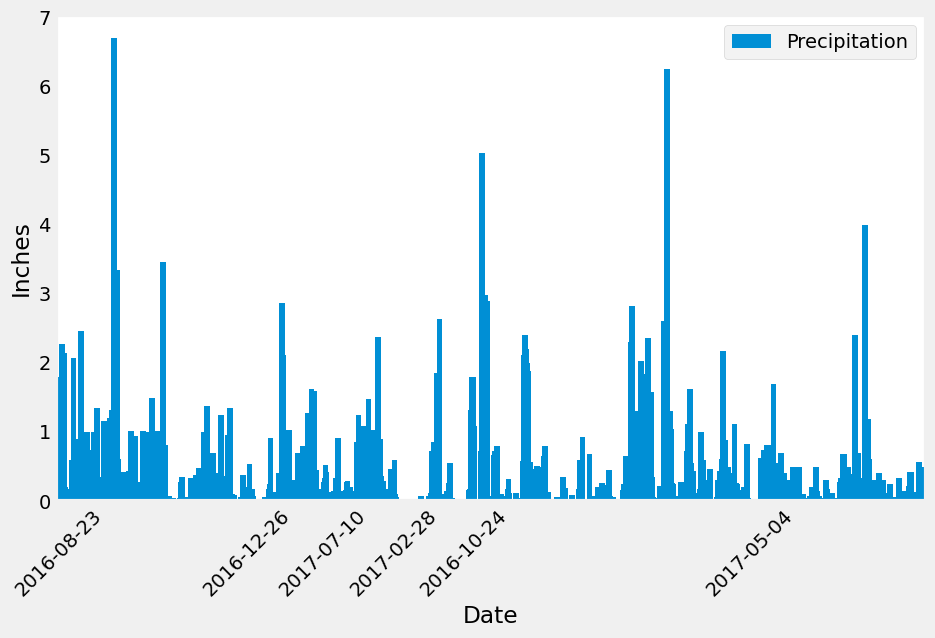

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = most_recent.date
end_date = dt.datetime.strptime(end_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
start_date = end_date - dt.timedelta(days=365)
end_date = end_date.strftime('%Y-%m-%d')
start_date = start_date.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
last_twelve = session.query(measurement).\
    filter(measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_twelve_result = []
for x in last_twelve:
     last_twelve_result.append((x.date, x.prcp))
last_twelve_df = pd.DataFrame(last_twelve_result, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
last_twelve_df = last_twelve_df.sort_values(by='Date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
rain_plot = last_twelve_df.plot(kind='bar', x='Date', y='Precipitation', 
                    xlabel='Date', 
                    ylabel='Inches',
                    # title='Precipitation',
                    figsize=(10, 6), 
                    width=15, 
                    grid=False
                   )
rain_plot.set_xticks(last_twelve_df.index[::400])
rain_plot.set_xticklabels(last_twelve_df["Date"][::400], rotation=45);
rain_plot.set_facecolor('white')

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_twelve_df[['Precipitation']].describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

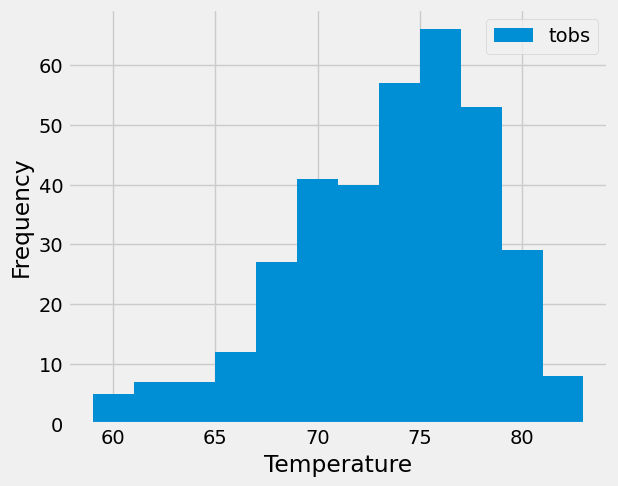

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()